In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:

# Ініціалізація вхідних даних (x1, x2) та правильних відповідей (0 або 1)
# X — це набір вхідних даних, де кожен рядок — це пара ознак (x1, x2)
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# y — це правильні мітки класів для кожного з прикладів
# Відповідні мітки: 0 або 1
y = np.array([[0],
              [1],
              [1],
              [0]])

# Ініціалізація параметрів нейронної мережі
input_layer_neurons = 2  # Кількість вхідних ознак (x1, x2)
hidden_layer_neurons = 2  # Кількість нейронів у прихованому шарі
output_layer_neurons = 1  # Кількість нейронів на виході (1 для бінарної класифікації)

# Ініціалізація ваг і зсувів випадковими значеннями
np.random.seed(42)  # Фіксоване зерно для відтворюваності результатів
weights_input_hidden = np.random.rand(input_layer_neurons, hidden_layer_neurons)  # Ваги між входом та прихованим шаром
weights_hidden_output = np.random.rand(hidden_layer_neurons, output_layer_neurons)  # Ваги між прихованим шаром та виходом
bias_hidden = np.random.rand(1, hidden_layer_neurons)  # Зсуви прихованого шару
bias_output = np.random.rand(1, output_layer_neurons)  # Зсуви вихідного шару


In [4]:

# Функція активації (сигмоида)
def sigmoid(x):
    # Використовуємо функцію активації сигмоїди для нелінійності
    return 1 / (1 + np.exp(-x))

# Похідна функції активації для оновлення ваг
def sigmoid_derivative(x):
    # Похідна сигмоїди для розрахунку градієнта
    return x * (1 - x)

# Навчання нейронної мережі
epochs = 10000  # Кількість епох навчання
learning_rate = 0.1  # Швидкість навчання
errors = []  # Список для збереження помилки на кожній епосі

# Навчання протягом 10000 епох
for epoch in range(epochs):
    # Прямий прохід (forward propagation)
    hidden_layer_activation = np.dot(X, weights_input_hidden) + bias_hidden  # Вхід в прихований шар
    hidden_layer_output = sigmoid(hidden_layer_activation)  # Вихід з прихованого шару після активації
    
    output_layer_activation = np.dot(hidden_layer_output, weights_hidden_output) + bias_output  # Вхід у вихідний шар
    predicted_output = sigmoid(output_layer_activation)  # Вихід з мережі (прогноз)

    # Обчислення помилки
    error = y - predicted_output  # Різниця між правильними мітками та передбаченими значеннями
    errors.append(np.mean(np.abs(error)))  # Додаємо середню абсолютну помилку до списку

    # Зворотний прохід (backpropagation) для коригування ваг
    d_predicted_output = error * sigmoid_derivative(predicted_output)  # Похідна помилки щодо вихідних значень
    error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)  # Помилка прихованого шару
    d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)  # Похідна помилки щодо прихованого шару
    
    # Оновлення ваг
    weights_input_hidden += X.T.dot(d_hidden_layer) * learning_rate  # Оновлюємо ваги між входом і прихованим шаром
    weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate  # Оновлюємо ваги між прихованим шаром і виходом
    bias_hidden += np.sum(d_hidden_layer, axis=0, keepdims=True) * learning_rate  # Оновлюємо зсуви прихованого шару
    bias_output += np.sum(d_predicted_output, axis=0, keepdims=True) * learning_rate  # Оновлюємо зсуви вихідного шару

    # Виводимо помилку кожні 1000 епох для моніторингу
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Error: {np.mean(np.abs(error))}")


Epoch 0, Error: 0.49941109351361046
Epoch 1000, Error: 0.49941746289218814
Epoch 2000, Error: 0.4954334735571877
Epoch 3000, Error: 0.4642172881284544
Epoch 4000, Error: 0.3847247285734434
Epoch 5000, Error: 0.22682781417835432
Epoch 6000, Error: 0.12977268704483105
Epoch 7000, Error: 0.09433226691552954
Epoch 8000, Error: 0.07639023554902642
Epoch 9000, Error: 0.06538713535818577



Прогнозування після навчання:
[[0.06029012]
 [0.94447222]
 [0.944367  ]
 [0.05997169]]


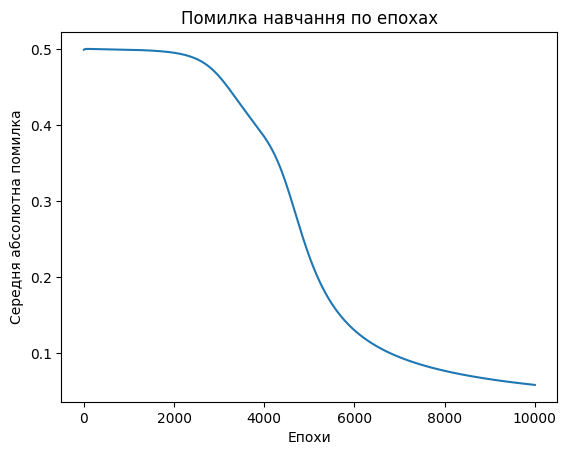

In [5]:

# Прогнозування на нових даних після навчання
print("Прогнозування після навчання:")
print(predicted_output)

# Візуалізація помилки навчання
# Малюємо графік середньої абсолютної помилки на кожній епосі
plt.plot(errors)
plt.title('Помилка навчання по епохах')
plt.xlabel('Епохи')  # Ось X — це кількість епох
plt.ylabel('Середня абсолютна помилка')  # Ось Y — це середня помилка
plt.show()  # Показуємо графік